<a href="https://colab.research.google.com/github/Arsham-Vosoughinia/Important-Demographic-Factors-in-English-Aquasation-As-Second-Language/blob/main/EnglishAqL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sqlalchemy import create_engine
pd.set_option('display.max_columns', 128)
pd.set_option('display.max_rows', 484)

# Display preferences
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

from sqlalchemy import create_engine
import seaborn as sns 
sns.set()

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

from scipy.stats import boxcox
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action="ignore")


from google.colab import files
# uploaded = files.upload()

df= pd.read_csv('/content/data.csv' ) 
#Dataset's link :  https://osf.io/pyb8s/wiki/home/

# Replacing nan values with number 0
df['Eng_country_yrs'] = df['Eng_country_yrs'].fillna(0)
df['Lived_Eng_per'] = df['Lived_Eng_per'].fillna(0)
df['house_Eng'] = df['house_Eng'].fillna(0)

#Droping the nan values from the following columns
df.dropna(subset=['age'],inplace=True)
df.dropna(subset=['Eng_little'],inplace=True)
df.dropna(subset=['Eng_start'],inplace=True)
df.dropna(subset=['currcountry'],inplace=True)
df = df.drop(df[df['gender'] == 'other'].index)
df = df.drop(df[df['psychiatric'] == 1].index)
df = df.drop(df[df['dyslexia'] == 1].index)

# New Section

In [ ]:
DataSet Sources: 
"https://www.sciencedirect.com/science/article/pii/S0010027718300994
http://l3atbc-public.s3.amazonaws.com/pub_pdfs/JK_Hartshorne_JB_Tenenbaum_S_Pinker_2018.pdf
https://osf.io/pyb8s/
http://web.archive.org/web/20180217125721/http://archive.gameswithwords.org/WhichEnglish/
https://osf.io/pyb8s/wiki/home/
https://medium.com/@chacon/mit-scientists-prove-adults-learn-language-to-fluency-nearly-as-well-as-children-1de888d1d45f"



# New Section

In [ ]:
df.shape

(546648, 129)

In [ ]:
# # Replacing value in column if a certain value is found
# # All other values in the cell are removed
# # e.g. if native language is english there is no reason to evaluate the participant based on other native language
# # value 'Other is removed
df['natlangs'] = df.natlangs.str.replace(r'(^.*English.*$)', 'English')
df['natlangs'] = df.natlangs.str.replace(r'(^.*Chinese.*$)', 'Chinese')

# df['natlangs'] = df.natlangs.str.replace('Taiwanese/Min Nan/Hokkien', 'Chinese')
# df['natlangs'] = df.natlangs.str.replace('Chinese/Wu/Shanghainese', 'Chinese')
# df['natlangs'] = df.natlangs.str.replace('Chinese/Mandarin', 'Chinese')
# df['natlangs'] = df.natlangs.str.replace('Chinese/Cantonese/Yue', 'Chinese')
# df['natlangs'] = df.natlangs.str.replace('Chinese/Wu/Shanghainese', 'Chinese')
# df['natlangs'] = df.natlangs.str.replace('Chinese/Hokkien', 'Chinese')
# df['natlangs'] = df.natlangs.str.replace('Chinese/Chinese', 'Chinese')

df['natlangs'] = df.natlangs.str.replace('(^.*Other.*$)', '')
df = df.drop(df[df['natlangs'] == ''].index)

# # Languages are grouped and replaced based on similarity and family groups
df['natlangs'] = df.natlangs.str.replace('Croatian', 'Serb-Cro-Bos')
df['natlangs'] = df.natlangs.str.replace('Bosnian', 'Serb-Cro-Bos')
df['natlangs'] = df.natlangs.str.replace('Serbian', 'Serb-Cro-Bos')
df['natlangs'] = df.natlangs.str.replace('Slovene', 'Serb-Cro-Bos')
df['natlangs'] = df.natlangs.str.replace('Macedonian', 'Serb-Cro-Bos')


df['natlangs'] = df.natlangs.str.replace('Russian', 'Rus-Bel-Ukr')
df['natlangs'] = df.natlangs.str.replace('Belarussian', 'Rus-Bel-Ukr')
df['natlangs'] = df.natlangs.str.replace('Ukrainian', 'Rus-Bel-Ukr')

df['natlangs'] = df.natlangs.str.replace('Portuguese', 'Sp-Por')
df['natlangs'] = df.natlangs.str.replace('Spanish', 'Sp-Por')
df['natlangs'] = df.natlangs.str.replace('Catalan', 'Sp-Por')

df['natlangs'] = df.natlangs.str.replace('Azeri', 'Turk_Az')
df['natlangs'] = df.natlangs.str.replace(' Turkish', 'Turkish')
df['natlangs'] = df.natlangs.str.replace('Turkish', 'Turk_Az')

df['natlangs'] = df.natlangs.str.replace('German', 'Ger_Dut')
df['natlangs'] = df.natlangs.str.replace('Dutch', 'Ger_Dut')

df['natlangs'] = df.natlangs.str.replace('Swedish', 'Scand')
df['natlangs'] = df.natlangs.str.replace('Danish', 'Scand')
df['natlangs'] = df.natlangs.str.replace('Norwegian', 'Scand')
df['natlangs'] = df.natlangs.str.replace('Czech', 'Cz-Slov')
df['natlangs'] = df.natlangs.str.replace('Slovak', 'Cz-Slov')

df['natlangs'] = df.natlangs.str.replace('Malay', 'Indo-Mal')
df['natlangs'] = df.natlangs.str.replace('Indonesian', 'Indo-Mal')
df['natlangs'] = df.natlangs.str.replace('Malayan', 'Indo-Mal')
df['natlangs'] = df.natlangs.str.replace('Malaysian', 'Indo-Mal')



df['natlangs'] = df.natlangs.str.replace('Urdu', 'Hindi-Urdu')
df['natlangs'] = df.natlangs.str.replace('Hindi', 'Hindi-Urdu')
df['natlangs'] = df.natlangs.str.replace('Punjabi', 'Hindi-Urdu')
df['natlangs'] = df.natlangs.str.replace('Gujarati', 'Hindi-Urdu')



df['natlangs'] = df.natlangs.str.replace('Dari', 'Farsi')
df['natlangs'] = df.natlangs.str.replace('Tajik', 'Farsi')
df['natlangs'] = df.natlangs.str.replace('Tadjik', 'Farsi')


df['natlangs'] = df.natlangs.str.replace('Romanian', 'Romanian')

df['natlangs'] = df.natlangs.str.replace('French', 'French')


In [ ]:
df['natlangs'] = df.natlangs.str.replace(r'Ger_Dut,Turk_Az', 'Ger_Dut')
df['natlangs'] = df.natlangs.str.replace(r'Swiss Ger_Dut', 'Ger_Dut')
df['natlangs'] = df.natlangs.str.replace(r'Hindi-Urdu-Urdu', 'Hindi-Urdu')


In [ ]:
df = df.explode('natlangs').reset_index(drop=True)


# df['natlangs'] = df['natlangs'].str.strip()
df['natlangs'] = df['natlangs'].str.split(', ')
df = df.explode('natlangs').reset_index(drop=True)


In [ ]:
df['natlangs'] = df.natlangs.str.replace(r'Ger_Dut,Turk_Az', 'Ger_Dut')
df['natlangs'] = df.natlangs.str.replace(r'Swiss Ger_Dut', 'Ger_Dut')
df['natlangs'] = df.natlangs.str.replace(r'Hindi-Urdu-Urdu', 'Hindi-Urdu')


In [ ]:
df['natlangs'] = pd.DataFrame(df['natlangs'].values.tolist(), index=df.index)
df['natlangs'] = df['natlangs'].str.split(',')
df = df.explode('natlangs').reset_index(drop=True)



In [ ]:
df['natlangs'] = df['natlangs'].str.strip()

df['natlangs'] = pd.DataFrame(df['natlangs'].values.tolist(), index=df.index)


In [ ]:
df['natlangs'].value_counts().head(50)

In [ ]:
df.shape

(546648, 129)

In [ ]:
# # Replacing value in column if a certain value is found
# # All other values in the cell are removed
# # e.g. if primary language is english there is no reason to evaluate the participant based on other primary language
# # value 'Other is removed

df['primelangs'] = df.primelangs.str.replace(r'(^.*English.*$)', 'English')
df['primelangs'] = df.primelangs.str.replace(r'(^.*Chinese.*$)', 'Chinese')
# df['primelangs'] = df.primelangs.str.replace('Chinese/Taiwanese/Min Nan/Hokkien', 'Chinese')
# df['primelangs'] = df.primelangs.str.replace('Chinese/Wu/Shanghainese', 'Chinese')
# df['primelangs'] = df.primelangs.str.replace('Chinese/Mandarin', 'Chinese')
# df['primelangs'] = df.primelangs.str.replace('Chinese/Cantonese/Yue', 'Chinese')
# df['primelangs'] = df.primelangs.str.replace('Chinese/Wu/Shanghainese', 'Chinese')
# df['primelangs'] = df.primelangs.str.replace('Chinese/Hokkien', 'Chinese')


df['primelangs'] = df.primelangs.str.replace('(^.*Other.*$)', '')
df = df.drop(df[df['primelangs'] == ''].index)


# # Languages are grouped and replaced based on similarity and family groups
df['primelangs'] = df.primelangs.str.replace('Croatian', 'Serb-Cro-Bos')
df['primelangs'] = df.primelangs.str.replace('Bosnian', 'Serb-Cro-Bos')
df['primelangs'] = df.primelangs.str.replace('Serbian', 'Serb-Cro-Bos')
df['primelangs'] = df.primelangs.str.replace('Slovene', 'Serb-Cro-Bos')
df['primelangs'] = df.primelangs.str.replace('Macedonian', 'Serb-Cro-Bos')


df['primelangs'] = df.primelangs.str.replace('Russian', 'Rus-Bel-Ukr')
df['primelangs'] = df.primelangs.str.replace('Belarussian', 'Rus-Bel-Ukr')
df['primelangs'] = df.primelangs.str.replace('Ukrainian', 'Rus-Bel-Ukr')

df['primelangs'] = df.primelangs.str.replace('Portuguese', 'Sp-Por')
df['primelangs'] = df.primelangs.str.replace('Spanish', 'Sp-Por')
df['primelangs'] = df.primelangs.str.replace('Catalan', 'Sp-Por')

df['primelangs'] = df.primelangs.str.replace('Azeri', 'Turk_Az')
df['primelangs'] = df.primelangs.str.replace('Turkish', 'Turk_Az')
df['primelangs'] = df.primelangs.str.replace('Turkish', 'Turk_Az')

df['primelangs'] = df.primelangs.str.replace('German', 'Ger_Dut')
df['primelangs'] = df.primelangs.str.replace('Dutch', 'Ger_Dut')

df['primelangs'] = df.primelangs.str.replace('Swedish', 'Scand')
df['primelangs'] = df.primelangs.str.replace('Danish', 'Scand')
df['primelangs'] = df.primelangs.str.replace('Norwegian', 'Scand')

df['primelangs'] = df.primelangs.str.replace('Czech', 'Cz-Slov')
df['primelangs'] = df.primelangs.str.replace('Slovak', 'Cz-Slov')

df['primelangs'] = df.primelangs.str.replace('Malay', 'Indo-Mal')
df['primelangs'] = df.primelangs.str.replace('Indonesian', 'Indo-Mal')
df['primelangs'] = df.primelangs.str.replace('Malayan', 'Indo-Mal')
df['primelangs'] = df.primelangs.str.replace('Malaysian', 'Indo-Mal')



df['primelangs'] = df.primelangs.str.replace('Urdu', 'Hindi-Urdu')
df['primelangs'] = df.primelangs.str.replace('Hindi', 'Hindi-Urdu')
df['primelangs'] = df.primelangs.str.replace('Punjabi', 'Hindi-Urdu')
df['primelangs'] = df.primelangs.str.replace('Gujarati', 'Hindi-Urdu')



df['primelangs'] = df.primelangs.str.replace('Dari', 'Farsi')
df['primelangs'] = df.primelangs.str.replace('Tajik', 'Farsi')
df['primelangs'] = df.primelangs.str.replace('Tadjik', 'Farsi')


df['primelangs'] = df.primelangs.str.replace('Romanian', 'Romanian')

df['primelangs'] = df.primelangs.str.replace('French', 'French')


In [ ]:
df['primelangs'] = df.primelangs.str.replace(r'Ger_Dut,Turk_Az', 'Ger_Dut')
df['primelangs'] = df.primelangs.str.replace(r'Swiss Ger_Dut', 'Ger_Dut')
df['primelangs'] = df.primelangs.str.replace(r'Hindi-Urdu-Urdu', 'Hindi-Urdu')

In [ ]:
df = df.explode('primelangs').reset_index(drop=True)


# df['primelangs'] = df['primelangs'].str.strip()
df['primelangs'] = df['primelangs'].str.split(', ')
df = df.explode('primelangs').reset_index(drop=True)

df['primelnags'] = pd.DataFrame(df['primelangs'].values.tolist(), index=df.index)
df['primelangs'] = df['primelangs'].str.split(',')
df = df.explode('primelangs').reset_index(drop=True)



In [ ]:
df['primelangs'] = df.primelangs.str.strip()



In [ ]:
df['primelnags'] = pd.DataFrame(df['primelangs'].values.tolist(), index=df.index)


In [ ]:
df['currcountry'] = df.currcountry.str.strip()
df['currcountry'] = df.currcountry.str.replace('(^.*The Netherlands.*$)', 'Netherlands')
df['currcountry'] = df.currcountry.str.replace('(^.*New Zealand.*$)', 'New Zealand')



In [ ]:
df.shape

(546648, 129)

In [ ]:
value_counts1 = df['natlangs'].value_counts()
v1=value_counts1[:34]
v1.index

Index(['English', 'Ger_Dut', 'Finnish', 'Turk_Az', 'Scand', 'Rus-Bel-Ukr',
       'Sp-Por', 'Hungarian', 'Polish', 'Chinese', 'French', 'Italian',
       'Serb-Cro-Bos', 'Cz-Slov', 'Romanian', 'Greek', 'Estonian', 'Indo-Mal',
       'Hindi-Urdu', 'Arabic', 'Bulgarian', 'Japanese', 'Korean', 'Lithuanian',
       'Vietnamese', 'Hebrew', 'Belarusian', 'Tagalog', 'Flemish', 'Icelandic',
       'Latvian', 'Farsi', 'Thai', 'Kurdish'],
      dtype='object')

In [ ]:
value_counts2  = df['primelangs'].value_counts()
v2=value_counts2[:35]
v2.index

Index(['English', 'Ger_Dut', 'Finnish', 'Scand', 'Turk_Az', 'Rus-Bel-Ukr',
       'Sp-Por', 'Hungarian', 'Polish', 'French', 'Italian', 'Chinese',
       'Cz-Slov', 'Serb-Cro-Bos', 'Romanian', 'Greek', 'Estonian', 'Japanese',
       'Indo-Mal', 'Hebrew', 'Lithuanian', 'Bulgarian', 'Flemish', 'Arabic',
       'Icelandic', 'Korean', 'Hindi-Urdu', 'Latvian', 'Thai', 'Vietnamese',
       'Tagalog', 'Kurdish', 'Galician', 'Afrikaans', 'Farsi'],
      dtype='object')

In [ ]:
cuco=df['currcountry'].value_counts().head(100)

In [ ]:
x=df[df['education'].isin(['Graduate Degree', 'Undergraduate Degree (3-5 years higher ed)',
       'Some Undergrad (higher ed)', 'High School Degree (12-13 years)',
       'Some Graduate School',
       "Haven't Finished High School (less than 13 years ed)",
       "Didn't Finish High School (less than 13 years ed)"])]


In [ ]:
# removing languages from the column 'natlangs' where there are limited number of participants coresponding to that value

#value_counts1 = df['natlangs'].value_counts()  # counting column 'natlangs unique values
# to_remove1 = value_counts1[value_counts1 > 480].index  # storing value counts under 240 
to_remove_df = df[df['natlangs'].isin(['English', 'Ger_Dut', 'Finnish', 'Turk_Az', 'Scand', 'Rus-Bel-Ukr',
       'Sp-Por', 'Hungarian', 'Polish', 'Chinese', 'French', 'Italian',
       'Serb-Cro-Bos', 'Cz-Slov', 'Romanian', 'Greek', 'Estonian', 'Indo-Mal',
       'Hindi-Urdu', 'Arabic', 'Bulgarian', 'Japanese', 'Korean', 'Lithuanian',
       'Vietnamese', 'Hebrew', 'Belarusian', 'Tagalog', 'Flemish', 'Icelandic',
       'Latvian', 'Farsi', 'Thai', 'Kurdish'])==True] # removing other variables if they are not stored in to_remove

# value_counts2 = df['primelangs'].value_counts()  # counting column 'natlangs unique values
# to_remove2 = value_counts2[value_counts2 > 160].index  # storing value counts under 240 
to_remove_df = to_remove_df[to_remove_df['primelangs'].isin(['English', 'Ger_Dut', 'Finnish', 'Scand', 'Turk_Az', 'Rus-Bel-Ukr',
       'Sp-Por', 'Hungarian', 'Polish', 'French', 'Italian', 'Chinese',
       'Cz-Slov', 'Serb-Cro-Bos', 'Romanian', 'Greek', 'Estonian', 'Japanese',
       'Indo-Mal', 'Hebrew', 'Lithuanian', 'Bulgarian', 'Flemish', 'Arabic',
       'Icelandic', 'Korean', 'Hindi-Urdu', 'Latvian', 'Thai', 'Vietnamese',
       'Tagalog', 'Kurdish', 'Galician', 'Afrikaans', 'Farsi'])==True]

# value_counts3 = df['currcountry'].value_counts()  # counting column 'natlangs unique values
# to_remove3 = value_counts3[value_counts3 >= 75].index  # storing value counts under 240 
to_remove_df = to_remove_df[to_remove_df['currcountry'].isin(df['currcountry'].value_counts().head(89).index)==True]

# # removing values in column 'primelangs' that do not match with the column 'natlangs'
# # to_remove_df=df[df["primelangs"].isin(['English', 'Vietnamese', 'Sp-Por', 'Ger_Dut', 'Finnish',
# #        'Estonian', 'Polish', 'Hebrew', 'Scand', 'French', 'Turk_Az',
# #        'Arabic', 'Italian', 'Chinese', 'Latvian', 'Korean', 'Rus-Bel-Ukr',
# #        'Greek', 'Cz-Slov', 'Serb-Cro-Bos', 'Hungarian', 'Romanian',
# #        'Bulgarian', 'Lithuanian', 'Thai', 'Indo-Mal', 'Flemish',
# #        'Icelandic', 'Farsi', 'Japanese']) == True]                

# removing unconventional educational degrees 
#value_counts_3 = df['education'].value_counts() # counting column 'education' unique values
#to_remove_3 = value_counts_3[value_counts_3 <= 46].index # storing value counts under 46


In [ ]:
to_remove_df['primelangs'].nunique()

35

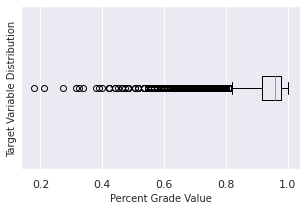

In [ ]:
# box plot of the target variable
plt.figure(figsize=(5,3))   # figure size
plt.boxplot(to_remove_df['correct'], vert=False)  #boxplot Horizontal 
plt.ylabel('Target Variable Distribution',size=10)  # setting y-axis label
plt.yticks([0],"")  # removing y ticks
plt.yticks(rotation = 90)  # rotate ticks to vertical
plt.xlabel('Percent Grade Value',size=10)  # setting x-axis label
# plt.xlabel('Mean of Logarithmic Grade Value',size=10)
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(to_remove_df['correct'],bins=50)  # Histogram of the target variable
# plt.xticks([1], ['Target Variable Distribution'])

plt.ylabel('Number of Participants',size=10)
plt.show()

In [ ]:
to_remove_df['age']=pd.cut(to_remove_df.age,bins=[0,10,15,20,30,40,50,60,70],labels=[10,15,20,30,40,50,60,70]) # clustering age vales into ranges 10-15-20-30-40-60-70
agebar=to_remove_df.groupby('age')['elogit'].mean().reset_index() # grouping the age groups based of their mean of grade value on column 'elogit
ax1=agebar.plot(x="age", y=["elogit"], kind="barh",figsize=(4,5), width=1,legend=None) # bar plot of the age and grade
ax1.set_yticklabels(('0-10', '10-15', '15-20', '20-30', '30-40','40-50','50-60','60-70','60-70','70-80')) # setting axis ticks to more sensible values representing ranges
plt.ylabel('Age Group of Patricipants',size=10)
plt.xlabel('Mean of Logarithmic Grade Value',size=10)
plt.show()


In [ ]:
to_remove_df['Eng_start']=pd.cut(to_remove_df.Eng_start,bins=[0,10,15,20,30,40,50,60,70],labels=[10,15,20,30,40,50,60,70]) # clustering age vales into ranges 10-15-20-30-40-60-70
startbar=to_remove_df.groupby('Eng_start')['elogit'].mean().reset_index() # grouping the age groups based of their mean of grade value on column 'elogit
ax=startbar.plot(x="Eng_start", y=["elogit"], kind="barh",figsize=(4,5),width=1,legend=None)  # bar plot of the age and grade
ax.set_yticklabels(('0-10', '10-15', '15-20', '20-30', '30-40','40-50','50-60','60-70')) # setting axis ticks to more sensible values representing ranges
plt.ylabel('Age Group at Start of English learning',size=10)
plt.xlabel('Mean of Logarithmic Grade Value',size=10)
plt.show()


In [ ]:
edubar=x[['education','elogit']] # storing education and target variable in a seperate set
# edubar['education'] = edubar.education.str.replace(r'(^.*Some Undergrad.*$)', 'Some Undergrad') # Shortening the education string values by replacing them
# edubar['education'] = edubar.education.str.replace(r'(^.*less than 13.*$)', 'Some High School') # Shortening the education string values by replacing them
# edubar['education'] = edubar.education.str.replace(r'(^.*12-13.*$)', 'High School Degree') # Shortening the education string values by replacing them
# edubar['education'] = edubar.education.str.replace(r'(^.*3-5.*$)', 'Undegrad Degree') # Shortening the education string values by replacing them



edubar=edubar.groupby('education')['elogit'].mean().reset_index().sort_values(by='elogit') # calculating the mean grade of each education level
edubar.plot(x="education", y=["elogit"], kind="barh",figsize=(6,5), width=1,legend=None) # bar plot of education and grade
plt.ylabel('Education Level',size=10)
plt.xlabel('Mean of Logarithmic Grade Value',size=10)
plt.yticks(size = 8)
plt.show()


In [ ]:
scbar=to_remove_df.groupby('Eng_country_yrs')['correct'].mean().reset_index().sort_values(by='correct') # grouping mean of grade and number of years lived in an English-speaking country
scbar.plot(x="Eng_country_yrs", y="correct", kind='scatter') # scatter plotting the above set
plt.xlabel("Years Lived in English-Speaking Country",size=10)
plt.ylabel('Logarithmic Grade Value',size=10)
plt.yticks(size = 8)
plt.show()

In [ ]:
scbar1=to_remove_df.groupby('Lived_Eng_per')['correct'].mean().reset_index().sort_values(by='correct') # grouping mean of grade and percentage years knowing english in an English-speaking country

scbar1.plot(x="Lived_Eng_per", y="correct", kind='scatter')
plt.xlabel("Percentage of years speaking English in English-speaking country",size=10)
plt.ylabel('Mean of Logarithmic Grade Value',size=10)
plt.yticks(size = 10)
plt.show()

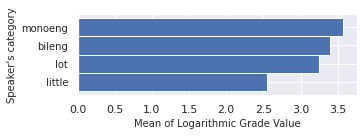

In [ ]:
sc2=to_remove_df.groupby('Eng_little')['elogit'].mean().reset_index().sort_values(by='elogit',ascending=False) # grouping mean of grade and English level

ax9=sc2.plot(x="Eng_little", y=["elogit"], kind="barh",figsize=(5,1.5),width=1,legend=None)
plt.ylabel("Speaker's category",size=10)
plt.xlabel('Mean of Logarithmic Grade Value',size=10)
# ax9.set_yticklabels((  'Only English', 'Bi-lengual','Advanced','Poor English')) # setting axis ticks to more sensible values 
ax9.invert_yaxis()
plt.yticks(size = 10)
plt.show()

In [ ]:
genderbar=to_remove_df.groupby('gender')['elogit'].mean().reset_index() # grouping based on gender
ax8=genderbar.plot(x="gender", y=["elogit"], kind="barh",figsize=(5,1),width=1,legend=None)
plt.ylabel("Gender",size=10)
plt.xlabel('Mean of Logarithmic Grade Value',size=10)
ax8.set_yticklabels(( 'Female','Male')) # setting axis ticks to more sensible values representing ranges
ax8.invert_yaxis()
plt.yticks(size = 10)
plt.show()


In [ ]:

to_remove_df1=to_remove_df[['natlangs','elogit']]

order = to_remove_df.groupby(by=["natlangs"])["elogit"].mean().sort_values()[::-1].index # grouping based on native languages sorted to be fed in violinplot
fig, nl = plt.subplots(figsize=(8,8))

 
# Give it to the violin plot
nl=sns.violinplot(x='natlangs', y='elogit', data=to_remove_df1, order=order, orient='v')
plt.xlabel("Native Language",size=10)
plt.xticks(rotation=90)
plt.xlabel('Mean of Logarithmic Grade Value',size=10)
plt.show()


to_remove_df2=to_remove_df[['natlangs','elogit']]

order1 = to_remove_df.groupby(by=["natlangs"])["elogit"].mean().sort_values()[::-1].index # grouping of primary languages and sorting them to be fed to the violin plot
fig, pl = plt.subplots(figsize=(8,8))

# Give it to the violin
pl=sns.violinplot(y='natlangs', x='elogit', data=to_remove_df2, order=order1,figsize=(7,5) )
plt.ylabel("Native Language",size=10)
plt.xlabel('Mean of Logarithmic Grade Value',size=10)
plt.show()

In [ ]:
to_remove_df2=to_remove_df[['primelangs','elogit']]

order1 = to_remove_df.groupby(by=["primelangs"])["elogit"].mean().sort_values()[::-1].index # grouping of primary languages and sorting them to be fed to the violin plot
fig, pl = plt.subplots(figsize=(8,8))

# Give it to the violin
pl=sns.violinplot(y='primelangs', x='elogit', data=to_remove_df2, order=order1, orient='h',figsize=(7,5) )
plt.ylabel("Primary Language",size=10)
plt.xlabel('Mean of Logarithmic Grade Value',size=10)
plt.show()

In [ ]:

sc2=to_remove_df.groupby('nat_Eng')['elogit'].mean().reset_index().sort_values(by='elogit',ascending=False) # grouping mean of grade and English level

ax9=sc2.plot(x="nat_Eng", y=["elogit"], kind="barh",figsize=(5,1.5),width=1,legend=None)
plt.ylabel("Speaker's category 2",size=10)
plt.xlabel('Mean of Logarithmic Grade Value',size=10)
ax9.set_yticklabels((  'Native', 'Foreign')) # setting axis ticks to more sensible values 
ax9.invert_yaxis()
plt.yticks(size = 10)
plt.show()

In [ ]:
# 'c' is the set that  to stores selected features
c=to_remove_df[['correct','currcountry','gender','type', 'speaker_cat','prime_Eng','nat_Eng','age','house_Eng','Eng_start','education','natlangs','primelangs','Lived_Eng_per','Eng_country_yrs','Eng_little']]

In [ ]:
# defing X and y variables to be used in the model
y=c['correct']
X=c[['gender','nat_Eng','age','Eng_start','natlangs','primelangs','Eng_little','Eng_country_yrs', 'currcountry','type']] # columns that will be evaluated
sc=pd.get_dummies(c['speaker_cat'],drop_first=True) # converting categorical columns to dummy columns
g=pd.get_dummies(c['gender'], drop_first=True)  # converting categorical columns to dummy columns
n=pd.get_dummies(c['natlangs']) # converting categorical columns to dummy columns
p=pd.get_dummies(c['primelangs']) # converting categorical columns to dummy columns
l=pd.get_dummies(c['Eng_little']) # converting categorical columns to dummy columns
t=pd.get_dummies(c['type']) # converting categorical columns to dummy columns
X['age_agst']=c['age']-c['Eng_start'] # Creating a new featre using age and age of start, coresponding to the years the person knows english for
e=pd.get_dummies(c['currcountry'])


X = X.drop(['gender'], axis =1).merge(g,left_index=True, right_index=True)  # drop the original column from X set and replace it with dummy columns
# X = X.drop(['speaker_cat'], axis =1).merge(sc,left_index=True, right_index=True) # drop the original column from X set and replace it with dummy columns
X = X.drop(['natlangs'], axis =1).merge(n,left_index=True, right_index=True) # drop the original column from X set and replace it with dummy columns
X = X.drop(['primelangs'], axis =1).merge(p,left_index=True, right_index=True) # drop the original column from X set and replace it with dummy columns
X = X.drop(['Eng_little'], axis =1).merge(l,left_index=True, right_index=True) # drop the original column from X set and replace it with dummy columns
X = X.drop(['type'], axis =1).merge(t,left_index=True, right_index=True) # drop the original column from X set and replace it with dummy columns
X = X.drop(['currcountry'], axis =1).merge(e,left_index=True, right_index=True) # drop the original column from X set and replace it with dummy columns


# spliting data set to train and test set with 3/4 of rows being in the train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




In [ ]:
X.shape # shape of X, (rows,columns)

(530292, 168)

In [ ]:
from scipy.stats import gaussian_kde # impotrting gaussion Kernal distribution estimation library


xy1 = np.vstack([c['Eng_country_yrs'],y]) # Preform kernel density on data to be used for scatter plot
z = gaussian_kde(xy1)(xy1)

fig, a5x = plt.subplots(figsize=(15,6))  # ploting the density of years spent in an english country 
a5x.scatter(y, c['Eng_country_yrs'],  c=z, s=25, edgecolor='')
plt.ylabel("Years Spent in a English-Speaking Country",size=11)
plt.xlabel('Logarithmic Grade value Distribution',size=11)


plt.show()




In [ ]:

xy = np.vstack([c['Lived_Eng_per'],y]) # Preforming kernel density on data to be used for scatter plot
z = gaussian_kde(xy)(xy)
fig, a4x = plt.subplots(figsize=(15,6))
a4x.scatter(y, c['Lived_Eng_per'],  c=z, s=75, edgecolor='') # ploting density for pecentage of english known time in an english speaking country
plt.ylabel("Percentage of years speaking English that lived in English-speaking country",size=11)
plt.xlabel('Logarithmic Grade value Distribution',size=11)


plt.show()

In [ ]:
X.shape

(530292, 168)

In [ ]:
# setting up the model to be used " Gradient Boosting Regressor"
clfG = ensemble.GradientBoostingRegressor(n_estimators=500, max_depth=None, max_features='auto', random_state=42)

results=clfG.fit(X_train, y_train) # fitting the train set into the model
print('r2 for train set is: ',round(clfG.score(X_train,y_train),2)) # printing the r2 value

resultsTest=clfG.fit(X_test, y_test) # fitting the test set into the model
print('r2 for test set is:',round(clfG.score(X_test,y_test),2))  # printing the r2 value



r2 for train set is:  0.60
r2 for test set is: 0.68


In [ ]:
from sklearn.metrics import mean_squared_error
import math



y_pred=clfG.predict(X_test)   # predicting y based on X_test data
MSE = mean_squared_error(y_test, y_pred) #comparing predicted and actual data , calculating the MSE
 
RMSE = math.sqrt(MSE) # calculating the Root of MSE

print("Root Mean Square Error:")
print(round(RMSE,2))

Root Mean Square Error:
0.03


In [ ]:
 from sklearn.metrics import mean_absolute_error

   # predicting y based on X_test data
MAE = mean_absolute_error(y_test, y_pred) #comparing predicted and actual data , calculating the MSE
 
RMAE = math.sqrt(MAE) # calculating the Root of MSE

print("Root Mean Absolute Error:")
print(round(RMAE,2))

Root Mean Absolute Error:
0.15


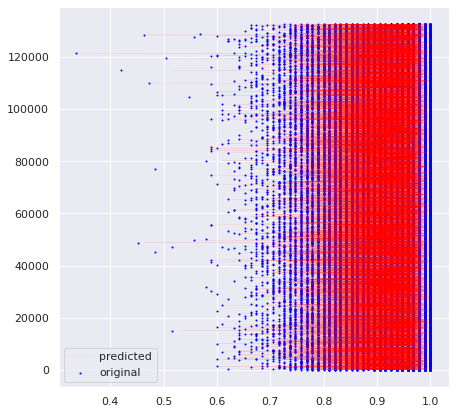

<Figure size 720x720 with 0 Axes>

In [ ]:
# ploting y original vs predicted
x_ax = range(len(y_test))     # getting the range of y on the test set for our plot
plt.figure(figsize=(7,7))     
dis=plt.scatter( y_test,x_ax, s=1, color="blue", label="original")  # setting up scatter plot for test data
plt.plot(y_pred, x_ax, lw=0.05, color="red", label="predicted") # laying the predicted data on the same plot as test data
plt.legend()
plt.figure(figsize=(10,10)) 

plt.show()

Below are some of the experiment done on data

In [ ]:
from sklearn.feature_selection import SelectFromModel  # using feature selection model
from sklearn.ensemble import AdaBoostRegressor  # evaluating performance based in AdaRegressor

estimator = GradientBoostingRegressor(random_state=42, n_estimators=500)
selector = SelectFromModel(estimator)
selector = selector.fit(X, y) 

In [ ]:
status = selector.get_support()      # identify the chosen columns using get_support 
print("Selection status: ", status) # list of selected columns based on true/false differention, index matches X indexes
from numpy import array 
pd.set_option('display.max_rows', 100)


features = X.columns     # storing and displaying all columns to be evaluted for feature selection
print("All features:")
print(features) 
  
print("Selected features:")  #
print(features[status])  # displaying the features that match in name with the selected
selector.transform(X)

Selection status:  [ True False False  True  True  True False  True False False False False
  True False False  True False False  True False False False False False
 False False False False False  True False  True  True False False False
  True False False False  True False  True False False False False False
  True False False False False False False False False False False False
 False False  True False False False False False  True False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False  True False
 False]
All features:
Index(['Eng_start', 'nat_Eng', 'prime_Eng', 'age', 'age_agst', 'male', 'late',
       'native', 'Arabic_x', 'Bulgarian_x',
       ...
       'South Africa', 'Spanish', 'Swedish', 'Swiss German', 'Thai', 'Turkish',
       'Ukraini

array([[ 0, 31, 31, ...,  0,  0,  1],
       [ 0, 19, 19, ...,  0,  0,  0],
       [ 0, 58, 58, ...,  0,  0,  1],
       ...,
       [ 7, 22, 15, ...,  0,  0,  0],
       [ 6, 22, 16, ...,  0,  0,  0],
       [10, 29, 19, ...,  0,  0,  0]])

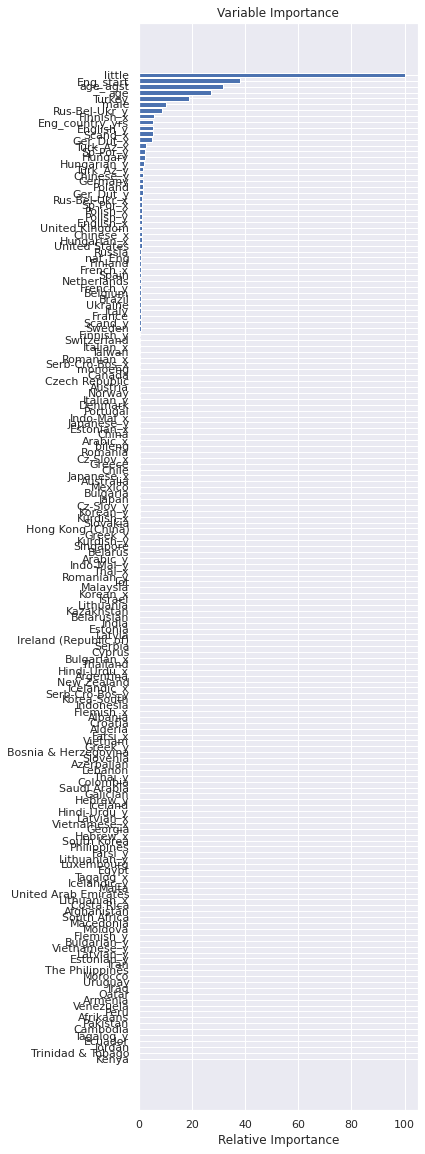

In [ ]:
feature_importance = clfG.feature_importances_    # using feature_importance to determine relative importance of each feature
# feature_importance=feature_importance[:5]     # the top 5 features are chosen for display
# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance) # sort features based importance value
pos = np.arange(sorted_idx.shape[0]) + .5   # assigning constant to be fed into plot for horizontal boundry 
fig, ax = plt.subplots(figsize=(5,20))

plt.barh(pos, feature_importance[sorted_idx], align='center') # setting up the bar plot
plt.yticks(pos, X.columns[sorted_idx]) # set the y ticks based on 'pos' 
# ax.set_yticklabels((  'Gender [male]','Native of English [nat_Eng]','Age [age]','Years Knowing English [age_agst]','Age at Start [Eng_start]')) # reassigning y-ticks to more sensible words

plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
import xgboost 

# selecting the best arguments for the model
xgbr = xgboost.XGBRegressor(random_state=42) # model to be used 
xgbr_params = {                               # parameters to be tested
     "learning_rate": [0.001, 0.01, 0.1],
     "n_estimator" : [300,500,700],
     "max_depth":[10, 15, 20]}

fs_xgbr = RandomizedSearchCV(xgbr, xgbr_params, cv=5, iid=False, n_jobs=-1)   # setting up model
fs_xgbr.fit(X, y) # firring X and y into the model

model = SelectFromModel(fs_xgbr.best_estimator_, prefit=True)   # estimating the best r2 value 
X_rfr = model.transform(X)  

# printing the selected features using get_support() similar to previous feature importance method
status = model.get_support() 
feature_name = X.columns[status]
print(feature_name)


 

[01:08:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Index(['nat_Eng', 'Turk_Az_x', 'little'], dtype='object')


In [ ]:
# obtaining smaller sample from  dataset 'c' to be used for trial and error looking at fater computation and time saving
c1=c.sample(n=25000, random_state=42)

In [ ]:
# repeating defining X and y for our subsample c1
y1=c1['correct']
X1=c1[['gender','type','nat_Eng','age','Eng_start','natlangs','primelangs','Eng_little','currcountry', 'Eng_country_yrs']]
sc1=pd.get_dummies(c1[['speaker_cat']])
g1=pd.get_dummies(c1['gender'], drop_first=True)
e1=pd.get_dummies(c1['currcountry'])
n1=pd.get_dummies(c1['natlangs'])
p1=pd.get_dummies(c1['primelangs'])
l1=pd.get_dummies(c['Eng_little'])
t1=pd.get_dummies(c['type'])
X1['age_agst']=c1['age']-c1['Eng_start']


X1 = X1.drop(['gender'], axis =1).merge(g1,left_index=True, right_index=True)
# X1 = X1.drop(['speaker_cat'], axis =1).merge(sc1,left_index=True, right_index=True)
X1 = X1.drop(['natlangs'], axis =1).merge(n1,left_index=True, right_index=True)
X1 = X1.drop(['primelangs'], axis =1).merge(p1,left_index=True, right_index=True)
X1 = X1.drop(['currcountry'], axis =1).merge(e1,left_index=True, right_index=True)
X1 = X1.drop(['Eng_little'], axis =1).merge(l1,left_index=True, right_index=True)
X1 = X1.drop(['type'], axis =1).merge(t1,left_index=True, right_index=True)


In [ ]:
# calculation r2 using Gradient boosting Regression for our sample data

clfG1 = ensemble.GradientBoostingRegressor(n_estimators=500, max_depth=15, random)
clfG1.fit(X1, y1)
print('-, none, auto ,- : ',clfG1.score(X1,y1))

# 300, 15, auto ,42 :  0.7254  No Eng_country_yrs
# 300, 15, auto,  - :  0.7246  No Eng_country_yrs
# 300, 15, auto ,42 :  0.7351
# 300,none,auto ,42 :  0.7595

-, none, auto ,- :  0.702281666710851


In [ ]:
clfGa = ensemble.GradientBoostingRegressor(n_estimators=500, max_depth=15, max_features=221, random_state=42)
clfGa.fit(X1, y1)
print(clfGa.score(X1,y1))



0.8180071544914745
